refer to [An intuitive, visual guide to copulas](https://twiecki.io/blog/2018/05/03/copulas/)

In [2]:
%matplotlib inline

import seaborn as sns
from scipy import stats

## Random Variable Transformation

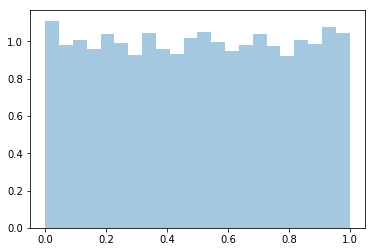

In [20]:
# uniform sampling
x = stats.uniform(0, 1).rvs(10000)
sns.distplot(x, kde=False, norm_hist=True)

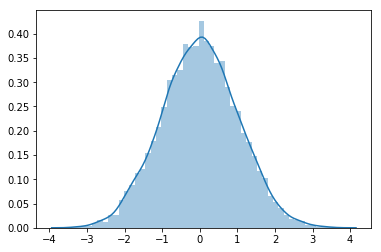

In [21]:
# inverse CDF
norm = stats.norm()
x_trans = norm.ppf(x)
sns.distplot(x_trans)

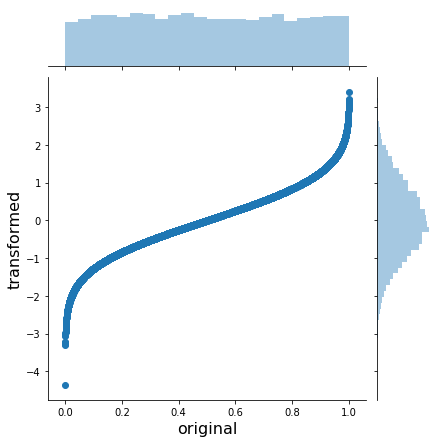

In [10]:
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16)

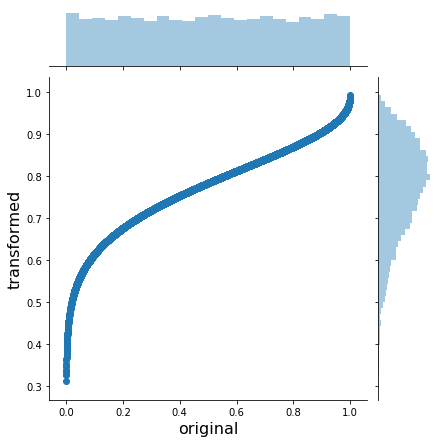

In [22]:
# same work for beta
beta = stats.beta(a=10, b=3)
x_trans = beta.ppf(x)
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16)

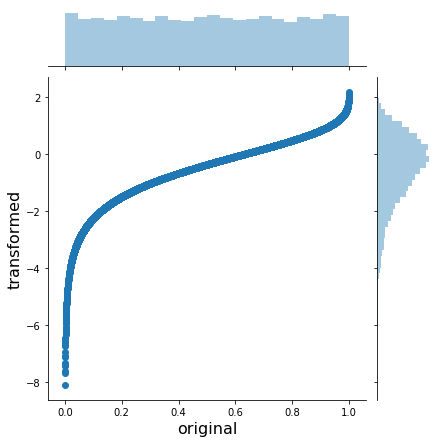

In [23]:
# same work for Gumbel
gumbel = stats.gumbel_l()
x_trans = gumbel.ppf(x)
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16)

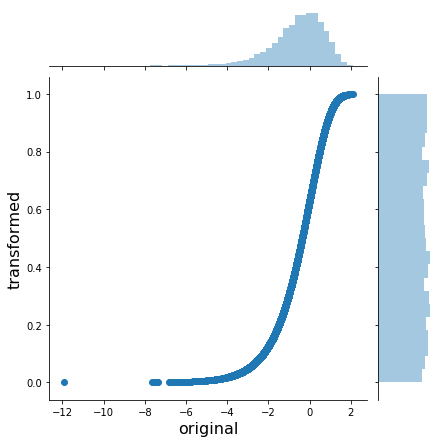

In [13]:
# convert an arbitrary distribution to the uniform (0, 1): CDF
x_trans_trans = gumbel.cdf(x_trans)
h = sns.jointplot(x_trans, x_trans_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16)

## Adding correlation with Gaussian copulas

In [24]:
mvnorm = stats.multivariate_normal(mean = [0, 0], cov = [[1., 0.5], [0.5, 1.]])
x = mvnorm.rvs(100000)

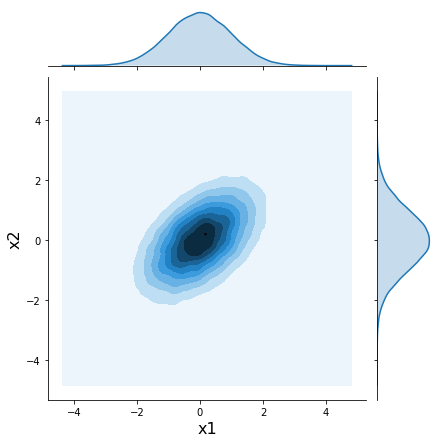

In [25]:
h = sns.jointplot(x[:, 0], x[:, 1], kind = 'kde', stat_func = None)
h.set_axis_labels('x1', 'x2', fontsize=16)

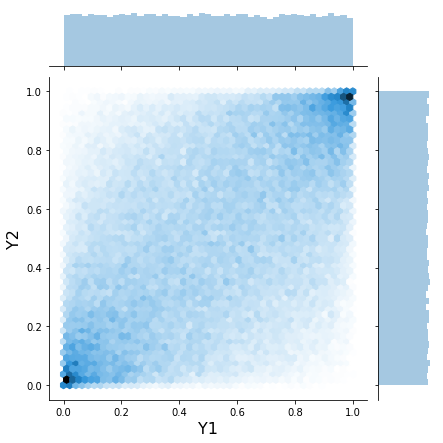

In [26]:
norm = stats.norm()
x_unif = norm.cdf(x)
h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex', stat_func=None)
h.set_axis_labels('Y1', 'Y2', fontsize=16)

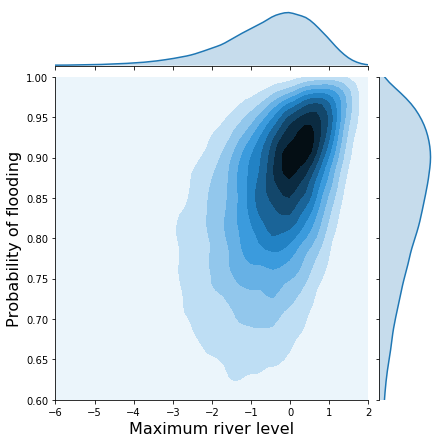

In [28]:
# transform the marginal
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

h = sns.jointplot(x1_trans, x2_trans, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None)
h.set_axis_labels('Maximum river level', 'Probability of flooding', fontsize=16)

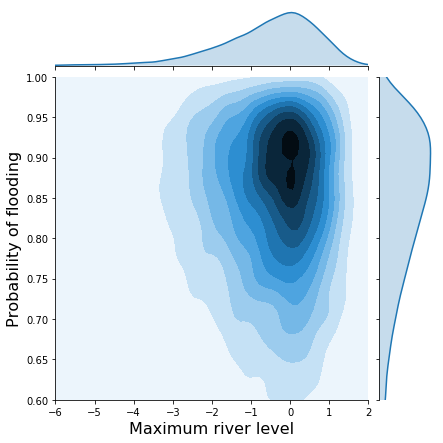

In [29]:
# compare with the joint distribution without correlation
x1 = m1.rvs(10000)
x2 = m2.rvs(10000)

h = sns.jointplot(x1, x2, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None)
h.set_axis_labels('Maximum river level', 'Probability of flooding', fontsize=16)